In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, classification_report, plot_roc_curve, precision_score
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from pandasql import sqldf

In [2]:
data=pd.read_csv("mortgage_data_fico.csv")

In [3]:
y=data["status_time"].values
x=data.drop(["status_time","FICO_orig_time","FICO_group"], axis=1).values

In [4]:
print("default:", len(data[data["status_time"]==1]))
print("pay off:", len(data[data["status_time"]==2]))

default: 15151
pay off: 26578


In [5]:
train_x, test_x, train_y, test_y=train_test_split(x, y, train_size=0.8,random_state=7)

In [6]:
print("default before SMOTE:", len(train_y[train_y==1]))
print("pay off before SMOTE:", len(train_y[train_y==2]))

default before SMOTE: 12143
pay off before SMOTE: 21240


In [7]:
SM=SMOTE(random_state=0)
S_train_x, S_train_y=SM.fit_sample(train_x, train_y)

In [8]:
print("default after SMOTE:", len(S_train_y[S_train_y==1]))
print("pay off after SMOTE:", len(S_train_y[S_train_y==2]))

default after SMOTE: 21240
pay off after SMOTE: 21240


In [9]:
model=LGBMClassifier(n_estimators=100,metric="auc")
model.fit(S_train_x,S_train_y,eval_set=[(test_x, test_y)])

[1]	valid_0's auc: 0.822353
[2]	valid_0's auc: 0.831434
[3]	valid_0's auc: 0.831879
[4]	valid_0's auc: 0.832978
[5]	valid_0's auc: 0.83636
[6]	valid_0's auc: 0.838592
[7]	valid_0's auc: 0.839284
[8]	valid_0's auc: 0.840696
[9]	valid_0's auc: 0.841697
[10]	valid_0's auc: 0.84286
[11]	valid_0's auc: 0.843175
[12]	valid_0's auc: 0.844121
[13]	valid_0's auc: 0.844929
[14]	valid_0's auc: 0.845721
[15]	valid_0's auc: 0.846223
[16]	valid_0's auc: 0.846658
[17]	valid_0's auc: 0.847165
[18]	valid_0's auc: 0.847734
[19]	valid_0's auc: 0.848212
[20]	valid_0's auc: 0.849025
[21]	valid_0's auc: 0.849057
[22]	valid_0's auc: 0.849454
[23]	valid_0's auc: 0.84987
[24]	valid_0's auc: 0.85048
[25]	valid_0's auc: 0.850549
[26]	valid_0's auc: 0.850959
[27]	valid_0's auc: 0.851497
[28]	valid_0's auc: 0.851524
[29]	valid_0's auc: 0.852145
[30]	valid_0's auc: 0.852399
[31]	valid_0's auc: 0.852759
[32]	valid_0's auc: 0.853152
[33]	valid_0's auc: 0.85346
[34]	valid_0's auc: 0.853906
[35]	valid_0's auc: 0.854271

LGBMClassifier(metric='auc')

In [11]:
y_pred = model.predict(test_x)
cm=confusion_matrix(test_y,y_pred)
print(classification_report(test_y-1,y_pred-1))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      3008
           1       0.84      0.85      0.85      5338

    accuracy                           0.80      8346
   macro avg       0.79      0.78      0.78      8346
weighted avg       0.80      0.80      0.80      8346



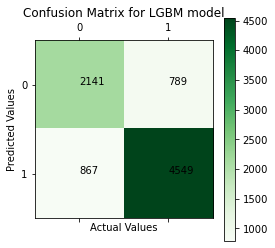

In [12]:
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
plt.annotate(cm[0,1],xy=(0,1))
plt.annotate(cm[1,1],xy=(1,1))
plt.annotate(cm[0,0],xy=(0,0))
plt.annotate(cm[1,0],xy=(1,0))
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Confusion Matrix for LGBM model")
plt.show()

In [13]:
cross_val_score(model, S_train_x, S_train_y, cv=5, scoring="accuracy").mean()

0.8260828625235405

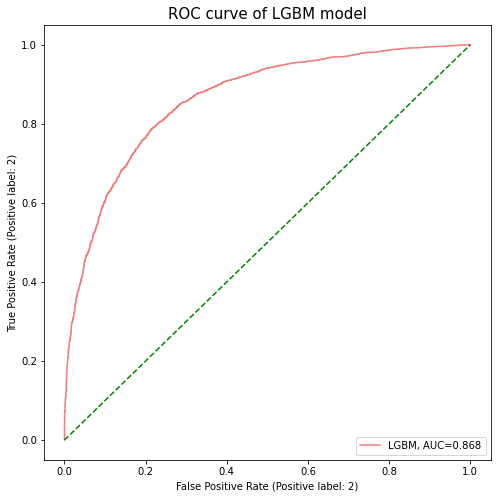

In [14]:
fig, ax=plt.subplots(figsize=(8,8))
plot_roc_curve(model, test_x, test_y, ax=ax, label="LGBM, AUC=0.868",color="lightcoral")
plt.title("ROC curve of LGBM model",fontsize=15)
plt.plot([0,1],[0,1],"g--")
plt.show()